In [70]:
%matplotlib inline
import matplotlib.pyplot as plt

In [71]:
import pandas as pd

In [72]:
df = pd.read_csv('/Users/Oran/Desktop/finalproject/tianya_bbs_threads_list_gdp.txt', sep = "\t", header=None)
df[:2]

,0,1,2,3,4,5,6
0,"一座城市房价的涨跌,对其GDP有什么影响?",/post-develop-2142230-1.shtml,费高皇马,http://www.tianya.cn/86680817,419,3,2016-05-14 15:33
1,"房价要遏制,畸形GDP必须要停止.",/post-develop-2141780-1.shtml,郑浩烽,http://www.tianya.cn/112448912,1396,16,2016-05-13 01:20


In [73]:
df=df.rename(columns = {0:'title', 1:'link', 2:'author',3:'author_page', 4:'click', 5:'reply', 6:'time'})
df[:5]

,title,link,author,author_page,click,reply,time
0,"一座城市房价的涨跌,对其GDP有什么影响?",/post-develop-2142230-1.shtml,费高皇马,http://www.tianya.cn/86680817,419,3,2016-05-14 15:33
1,"房价要遏制,畸形GDP必须要停止.",/post-develop-2141780-1.shtml,郑浩烽,http://www.tianya.cn/112448912,1396,16,2016-05-13 01:20
2,求问 单位GDP能耗下降的意义,/post-develop-2138701-1.shtml,忙着还贷,http://www.tianya.cn/75692431,101,1,2016-04-30 15:11
3,"何雯论金:美元耻GDP落井下石,油价炽市场蜂拥而至(内含K线技术...",/post-develop-2138239-1.shtml,异花独秀,http://www.tianya.cn/103676161,144,12,2016-04-29 09:24
4,24个省份一季度GDP增速超全国(转载),/post-develop-2137039-1.shtml,野原新之助2016,http://www.tianya.cn/110893035,206,1,2016-04-25 10:11


In [74]:
da = pd.read_csv('/Users/Oran/Desktop/finalproject/tianya_bbs_threads_gdp_author_info1.txt', sep = "\t", header=None)
da[:2]

,0,1,2,3,4
0,http://www.tianya.cn/86680817,1,21,50,1401
1,http://www.tianya.cn/112448912,0,0,2,10


In [75]:
da=da.rename(columns = {0:'author_page', 1:'followed_num', 2:'fans_num',3:'post_num', 4:'comment_num'})
da[:5]

,author_page,followed_num,fans_num,post_num,comment_num
0,http://www.tianya.cn/86680817,1,21,50,1401
1,http://www.tianya.cn/112448912,0,0,2,10
2,http://www.tianya.cn/75692431,4,17,2,114
3,http://www.tianya.cn/103676161,14,18,90,639
4,http://www.tianya.cn/110893035,0,0,9,0


In [76]:
data = pd.concat([df,da], axis=1)
len(data)

1049

In [77]:
import statsmodels.api as sm


## 对数据的描述主要分为三个层面：1.每个指标的基本数据层面   2.不同指标间关系层面 3. 时间轴层面

In [78]:
data.describe()


,click,reply
count,1049.000000,1049.000000
mean,1816.066730,18.452812
std,12931.680833,173.110795
min,10.000000,0.000000
25%,82.000000,0.000000
50%,209.000000,2.000000
75%,605.000000,7.000000
max,258021.000000,5226.000000


## （首先，从基本数据层面进行统计分析）从上面可见的描述图可见，在1049个数据当中，点击量的平均数是大约在1816次，从3/4位点回复是605次，从这可以看出这个数据分布的非常不平衡，有些贴子的点击量非常大，拉高了整体平均的情况很严重。另外同理可以发现，3/4位点的回帖数只有7，但是由于极少部分的帖子的回帖量很大，左右拉高了整体的回帖数，回帖量仍然分布不平均。

In [79]:
import numpy as np

np.mean(data.click), np.std(data.click), np.sum(data.click)

(1816.0667302192564, 12925.515549579826, 1905054)

## 从这部分对于点击量的数据可以看到关于GDP的帖子的点击量接近200万

In [80]:
d1 = sm.stats.DescrStatsW(data.click, weights=[1 for i in data.click])
d1.mean, d1.var, d1.std, d1.sum

(1816.0667302192564, 167068952.22242981, 12925.515549579824, 1905054.0)

In [81]:
d1 = sm.stats.DescrStatsW(data.click, weights=data.reply)
d1.mean, d1.var, d1.std, d1.sum

(103109.45306607429, 11857566378.111002, 108892.4532651873, 1995889683.0)

In [82]:
np.median(data.click)


209.0

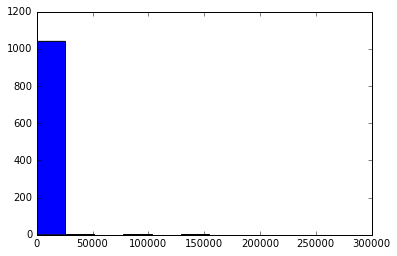

In [83]:
plt.hist(data.click)
plt.show()

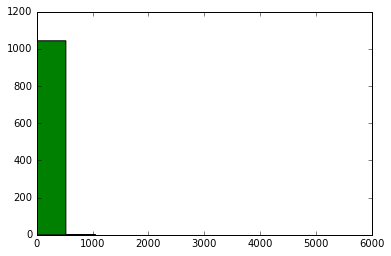

In [84]:

plt.hist(data.reply, color = 'green')
plt.show()

## 从这个图可以看出，点击量在0-25000之间的占据整体数据的绝大多数超过1000条，同样回帖数在0-1000的已经占据了1000条。而点击量个回帖数超过这个热度的只有极少数帖子。

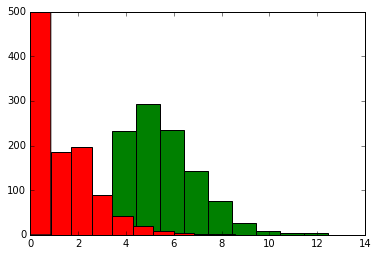

In [85]:
plt.hist(np.log(data.click+1), color='green')
plt.hist(np.log(data.reply+1), color='red')
plt.show()

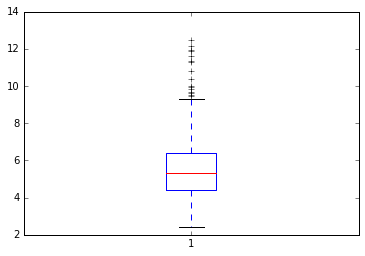

In [86]:
plt.boxplot([np.log(data.click+1)])
plt.show()

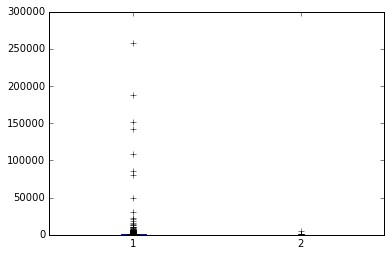

In [87]:
plt.boxplot([data.click, data.reply])
plt.show()

In [88]:
def transformData(dat):
    results = []
    for i in dat:
        if i != 'na':
            results.append( int(i))
        else:
            results.append(0)
    return results

In [89]:
data.fans_num = transformData(data.fans_num)
data.followed_num = transformData(data.followed_num )
data.post_num = transformData(data.post_num )
data.comment_num = transformData(data.comment_num )

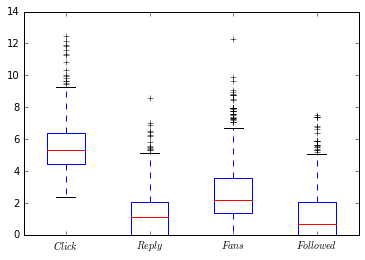

In [90]:
plt.boxplot([np.log(data.click+1), np.log(data.reply+1), 
             np.log(data.fans_num+1), np.log(data.followed_num + 1)], 
            labels = ['$Click$', '$Reply$', '$Fans$', '$Followed$'])
plt.show()

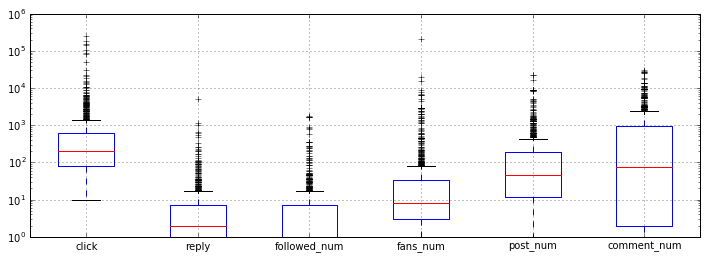

In [91]:

fig = plt.figure(figsize=(12,4))
data.boxplot(return_type='dict')
plt.yscale('log')
plt.show()

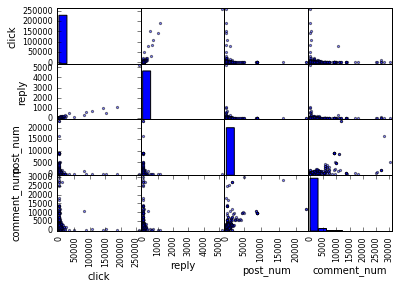

NameError: name 'pandas' is not defined

In [92]:
from pandas.tools import plotting

#fig = plt.figure(figsize=(10, 10))
plotting.scatter_matrix(data[['click', 'reply', 'post_num','comment_num']]) 
plt.show()
dir(pandas.tools)

## （从各指标关系层面进行统计分析）

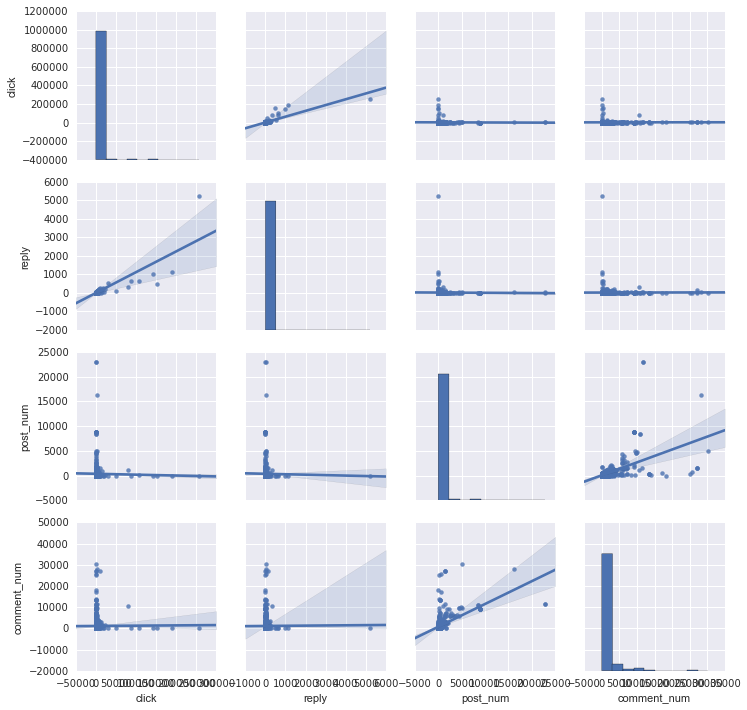

In [93]:
import seaborn 
seaborn.pairplot(data, vars=['click', 'reply', 'post_num', 'comment_num'],
                  kind='reg')  

## 从上面图中可以看出点击量和回贴数有比较强的线性关系，用户发贴数量和评论数量有较强的线性关系;

In [94]:
date = map(lambda x: x[:10], data.time)
data['date'] = pd.to_datetime(date)

In [95]:
data.time = pd.to_datetime(data.time)
data['month'] = data.time.dt.month
data['year'] = data.time.dt.year
data['day'] = data.time.dt.day

In [96]:
data.describe()

,click,reply,followed_num,fans_num,post_num,comment_num,month,year,day
count,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000
mean,1816.066730,18.452812,21.673975,394.925643,374.281220,1127.687321,6.438513,2013.736892,16.481411
std,12931.680833,173.110795,129.493112,6535.553419,1484.217066,3020.612002,3.466068,1.073351,8.652532
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2012.000000,1.000000
25%,82.000000,0.000000,0.000000,3.000000,12.000000,2.000000,3.000000,2013.000000,9.000000
50%,209.000000,2.000000,1.000000,8.000000,46.000000,75.000000,7.000000,2014.000000,17.000000
75%,605.000000,7.000000,7.000000,34.000000,186.000000,976.000000,9.000000,2014.000000,24.000000
max,258021.000000,5226.000000,1817.000000,209118.000000,22903.000000,30285.000000,12.000000,2016.000000,31.000000


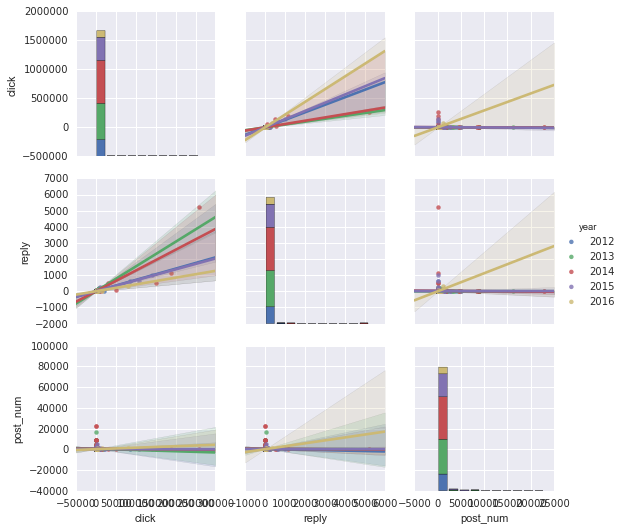

In [97]:
seaborn.pairplot(data, vars=['click', 'reply', 'post_num'],
                 kind='reg', hue='year')  

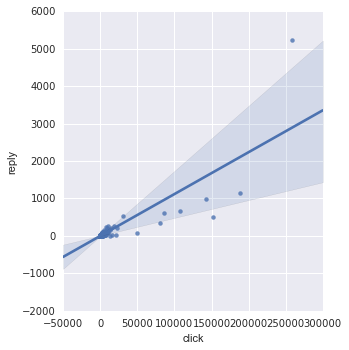

In [98]:
seaborn.lmplot(y='reply', x='click', data=data)  


## 上面用了多种方法验证点击量和回帖数的关系

In [30]:
data.year.value_counts() 

2014    360
2013    299
2015    193
2012    141
2016     56
Name: year, dtype: int64

## （第三，在时间轴层面比较各数据变化）把年份作为一个维度可以进一步分析数据随时间的变化

In [31]:
d = data.year.value_counts()
dd = pd.DataFrame(d)
dd = dd.sort_index(axis=0, ascending=True)
dd

,year
2012,141
2013,299
2014,360
2015,193
2016,56


In [32]:
dd.index


Int64Index([2012, 2013, 2014, 2015, 2016], dtype='int64')

In [33]:
dd_date_str = map(lambda x: str(x) +'-01-01', dd.index)
dd_date_str

['2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01']

In [34]:
dd_date = pd.to_datetime(dd_date_str)
dd_date

DatetimeIndex(['2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
               '2016-01-01'],
              dtype='datetime64[ns]', freq=None)

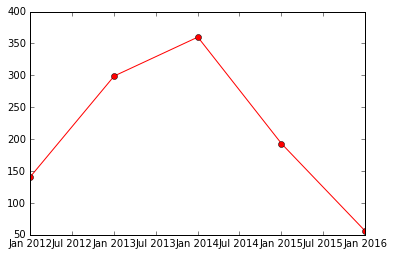

In [35]:
plt.plot(dd_date, dd.year, 'r-o')
plt.show()

## 从上图可以看到帖子的数量经历13年迅速增加后在14年达到高峰，随后热度下降，数量呈现下降趋势

In [36]:
ds = dd.cumsum()
ds

,year
2012,141
2013,440
2014,800
2015,993
2016,1049


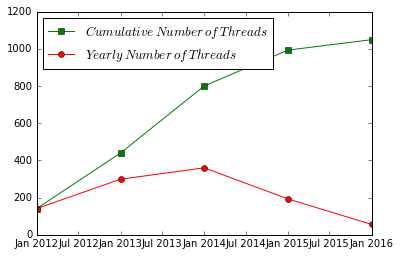

In [37]:

d = data.year.value_counts()
dd = pd.DataFrame(d)
dd = dd.sort_index(axis=0, ascending=True)
ds = dd.cumsum()

def getDate(dat):
    dat_date_str = map(lambda x: str(x) +'-01-01', dat.index)
    dat_date = pd.to_datetime(dat_date_str)
    return dat_date

ds.date = getDate(ds)
dd.date = getDate(dd)

plt.plot(ds.date, ds.year, 'g-s', label = '$Cumulative\: Number\:of\: Threads$')#ds_date#
plt.plot(dd.date, dd.year, 'r-o', label = '$Yearly\:Number\:of\:Threads$')
plt.legend(loc=2,numpoints=1,fontsize=13)
plt.show()

In [38]:
data.groupby('year')['click'].sum()


year
2012    176796
2013    183475
2014    945547
2015    452337
2016    146899
Name: click, dtype: int64

In [39]:
data.groupby('year')['click'].mean()


year
2012    1253.872340
2013     613.628763
2014    2626.519444
2015    2343.715026
2016    2623.196429
Name: click, dtype: float64

## 根据进一步分析数据发现，尽管13年数据帖子增长量比较大在各年份总贴数中排列第二但是13年的每个帖子的平均点击量却是最小的，由此可以看出13年的论坛用户对于帖子的参与度并不高，从总的反应来看14年还是热度的最高峰

In [40]:
repost = []
for i in df.title:
    if u'转载' in i.decode('utf8'):
        repost.append(1)
    else:
        repost.append(0)

In [46]:
df['repost'] = repost

In [42]:
df.groupby('repost').sum()

,click,reply
repost,,
0,1725697,18243
1,179357,1114


## 从上图可见原创文章获得的点赞和回贴数均超过转载文章的10倍以上，原创文章的各项表现力更好

In [43]:
dg = data.groupby('year').sum()
dg

,click,reply,followed_num,fans_num,post_num,comment_num,month,day
year,,,,,,,,
2012,176796,1638,2462,23629,49856,117968,1340,2597
2013,183475,2810,8910,81231,133575,468518,1904,4608
2014,945547,10217,9186,265030,157828,401460,2193,5693
2015,452337,3888,1875,17961,44584,163122,1186,3408
2016,146899,804,303,26426,6778,31876,131,983


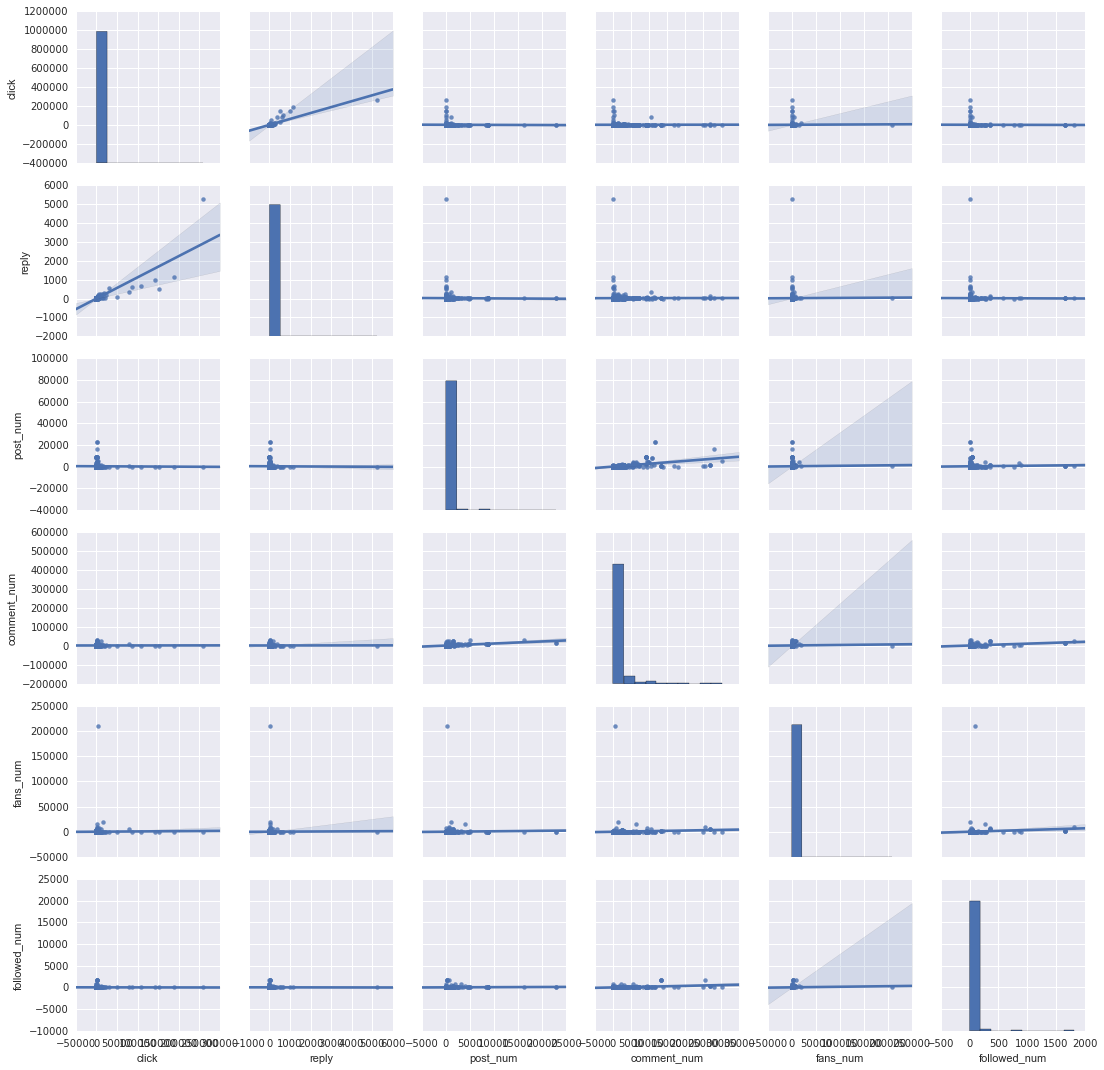

In [99]:
import seaborn 
seaborn.pairplot(data, vars=['click', 'reply', 'post_num', 'comment_num',"fans_num","followed_num"],
                  kind='reg')  

## 从上面的关系图中可以看到本来以为“用户粉丝数”多的年份，帖子热度会更高（点击量回帖数等会更大），但是通过作图发现并没有出现明显关系；呈现明显的线性关系的还是只有回帖数和点击量

In [47]:
def getDate(dat):
    dat_date_str = map(lambda x: str(x) +'-01-01', dat.index)
    dat_date = pd.to_datetime(dat_date_str)
    return dat_date

dg.date = getDate(dg)

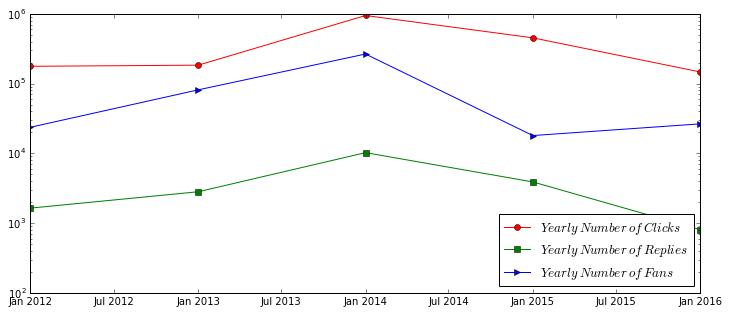

In [48]:
fig = plt.figure(figsize=(12,5))
plt.plot(dg.date, dg.click, 'r-o', label = '$Yearly\:Number\:of\:Clicks$')
plt.plot(dg.date, dg.reply, 'g-s', label = '$Yearly\:Number\:of\:Replies$')
plt.plot(dg.date, dg.fans_num, 'b->', label = '$Yearly\:Number\:of\:Fans$')

plt.yscale('log')

plt.legend(loc=4,numpoints=1,fontsize=13)
plt.show()

In [49]:
data.groupby('year')['click'].sum()

year
2012    176796
2013    183475
2014    945547
2015    452337
2016    146899
Name: click, dtype: int64

In [51]:
data.groupby('year')['click'].mean()

year
2012    1253.872340
2013     613.628763
2014    2626.519444
2015    2343.715026
2016    2623.196429
Name: click, dtype: float64

## T-test 

In [53]:
from scipy import stats
stats.ttest_ind(df['click'], df['repost'])

Ttest_indResult(statistic=4.5477075067826531, pvalue=5.7328960561512689e-06)

## Correlation

In [54]:
data.corr()

,click,reply,followed_num,fans_num,post_num,comment_num,month,year,day
click,1.000000,0.835755,-0.010519,0.010663,-0.015505,0.005871,-0.000968,0.048830,-0.026160
reply,0.835755,1.000000,-0.006479,0.004866,-0.010668,0.004495,0.033030,0.023125,-0.044938
followed_num,-0.010519,-0.006479,1.000000,0.067211,0.045792,0.421899,0.029389,-0.036873,-0.031885
fans_num,0.010663,0.004866,0.067211,1.000000,0.019952,0.057370,-0.024619,0.006981,-0.006841
post_num,-0.015505,-0.010668,0.045792,0.019952,1.000000,0.528904,0.043844,-0.043033,-0.041251
comment_num,0.005871,0.004495,0.421899,0.057370,0.528904,1.000000,0.054005,-0.048955,-0.059837
month,-0.000968,0.033030,0.029389,-0.024619,0.043844,0.054005,1.000000,-0.348554,-0.014777
year,0.048830,0.023125,-0.036873,0.006981,-0.043033,-0.048955,-0.348554,1.000000,0.012419
day,-0.026160,-0.044938,-0.031885,-0.006841,-0.041251,-0.059837,-0.014777,0.012419,1.000000


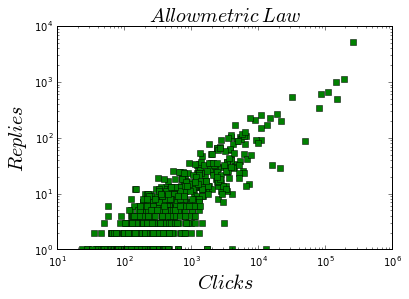

In [56]:
plt.plot(df.click, df.reply, 'gs')
plt.xlabel('$Clicks$', fontsize = 20)
plt.ylabel('$Replies$', fontsize = 20)
plt.xscale('log')
plt.yscale('log')
plt.title('$Allowmetric\,Law$', fontsize = 20)
plt.show()

## Regression

In [57]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [58]:
dat = sm.datasets.get_rdataset("Guerry", "HistData").data
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()

In [59]:
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Sun, 26 Jun 2016   Prob (F-statistic):           1.90e-08
Time:                        21:14:12   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

In [60]:
reg = smf.ols('reply ~ click + followed_num', data=data).fit()

In [61]:
print reg.summary()

                            OLS Regression Results                            
Dep. Variable:                  reply   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     1212.
Date:                Sun, 26 Jun 2016   Prob (F-statistic):          4.72e-273
Time:                        21:14:25   Log-Likelihood:                -6265.6
No. Observations:                1049   AIC:                         1.254e+04
Df Residuals:                    1046   BIC:                         1.255e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       -1.9327      3.008     -0.643   

In [62]:
reg1 = smf.ols('np.log(reply+1) ~ np.log(click+1) +np.log(followed_num+1)+month', data=data).fit()
print reg1.summary()

                            OLS Regression Results                            
Dep. Variable:      np.log(reply + 1)   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     997.5
Date:                Sun, 26 Jun 2016   Prob (F-statistic):          4.40e-306
Time:                        21:14:33   Log-Likelihood:                -1096.9
No. Observations:                1049   AIC:                             2202.
Df Residuals:                    1045   BIC:                             2222.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept               

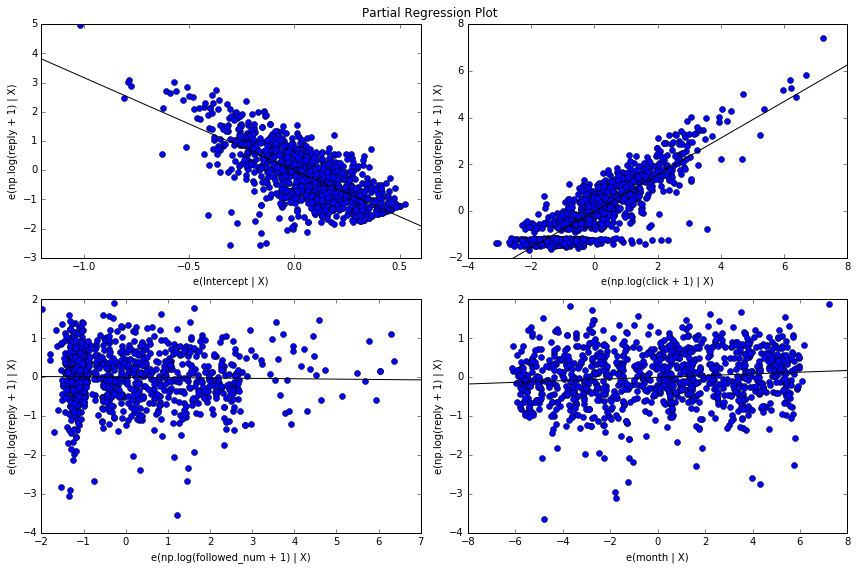

In [63]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(reg1, fig = fig)
plt.show()

In [64]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

moore = sm.datasets.get_rdataset("Moore", "car",
                                 cache=True) # load data
data = moore.data
data = data.rename(columns={"partner.status" :
                             "partner_status"}) # make name pythonic

In [66]:
moore_lm = ols('conformity ~ C(fcategory, Sum)*C(partner_status, Sum)',
                 data=data).fit()

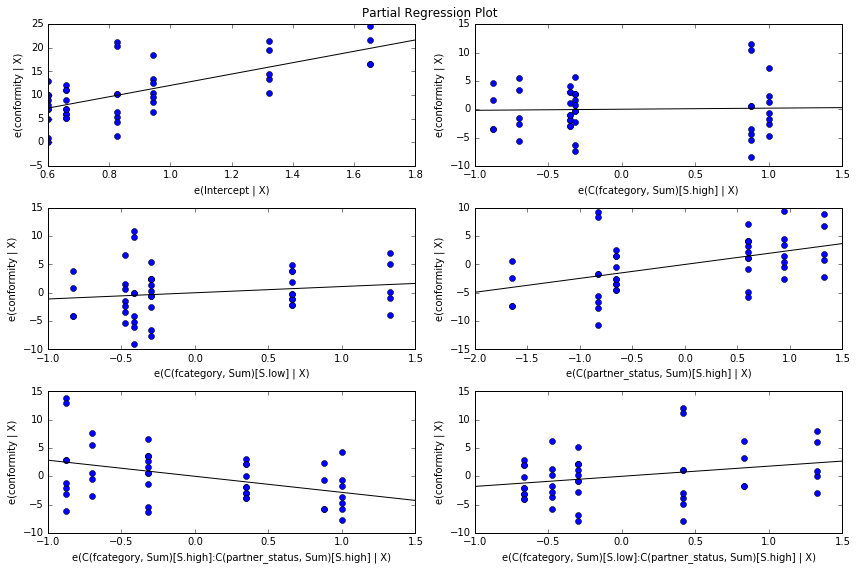

In [67]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(moore_lm, fig = fig)
plt.show()

In [68]:
table = sm.stats.anova_lm(moore_lm, typ=2) # Type 2 ANOVA DataFrame
print table

                                              sum_sq    df          F  \
C(fcategory, Sum)                          11.614700   2.0   0.276958   
C(partner_status, Sum)                    212.213778   1.0  10.120692   
C(fcategory, Sum):C(partner_status, Sum)  175.488928   2.0   4.184623   
Residual                                  817.763961  39.0        NaN   

                                            PR(>F)  
C(fcategory, Sum)                         0.759564  
C(partner_status, Sum)                    0.002874  
C(fcategory, Sum):C(partner_status, Sum)  0.022572  
Residual                                       NaN  
